# Heart Disease Prediction

Importing Required Libraries

In [131]:
# EDA
## Analysis
import pandas as pd
import numpy as np
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#-------------------------------------------------
# Machine Learning
## Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

## Models and Evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
### Regression
from sklearn.metrics import mean_squared_error, r2_score # Evaluation Regression model only
### Classification
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score # Evaluation Classification model only

In [132]:
df =pd.read_csv('./heart.csv')
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [134]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [135]:
df.duplicated().sum()

0

In [136]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [137]:
for col in ['Sex', 'ChestPainType',  'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f"{col}: {sorted(df[col].unique())}")

Sex: ['F', 'M']
ChestPainType: ['ASY', 'ATA', 'NAP', 'TA']
RestingECG: ['LVH', 'Normal', 'ST']
ExerciseAngina: ['N', 'Y']
ST_Slope: ['Down', 'Flat', 'Up']


In [138]:
le = LabelEncoder()

df['Sex_Encoded'] = le.fit_transform(df['Sex'])
print(le.classes_)
df['ChestPainType_Encoded'] = le.fit_transform(df['ChestPainType'])
print(le.classes_)
df['RestingECG_Encoded'] = le.fit_transform(df['RestingECG'])
print(le.classes_)
df['ExerciseAngina_Encoded'] = le.fit_transform(df['ExerciseAngina'])
print(le.classes_)
df['ST_Slope_Encoded'] = le.fit_transform(df['ST_Slope'])
print(le.classes_)

['F' 'M']
['ASY' 'ATA' 'NAP' 'TA']
['LVH' 'Normal' 'ST']
['N' 'Y']
['Down' 'Flat' 'Up']


In [139]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_Encoded,ChestPainType_Encoded,RestingECG_Encoded,ExerciseAngina_Encoded,ST_Slope_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1


In [140]:
X = df.drop(columns=[
                    'HeartDisease','Sex', 'ChestPainType',
                    'RestingECG', 'ExerciseAngina', 'ST_Slope'])
                    #'Cholesterol','ChestPainType_Encoded','MaxHR','ST_Slope_Encoded'])
Y = df['HeartDisease']

In [141]:
X.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_Encoded,ChestPainType_Encoded,RestingECG_Encoded,ExerciseAngina_Encoded,ST_Slope_Encoded
0,40,140,289,0,172,0.0,1,1,1,0,2
1,49,160,180,0,156,1.0,0,2,1,0,1


In [142]:
correlation_matrix = df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']).corr()
print(correlation_matrix['HeartDisease'].sort_values(ascending=False))


HeartDisease              1.000000
ExerciseAngina_Encoded    0.494282
Oldpeak                   0.403951
Sex_Encoded               0.305445
Age                       0.282039
FastingBS                 0.267291
RestingBP                 0.107589
RestingECG_Encoded        0.057384
Cholesterol              -0.232741
ChestPainType_Encoded    -0.386828
MaxHR                    -0.400421
ST_Slope_Encoded         -0.558771
Name: HeartDisease, dtype: float64


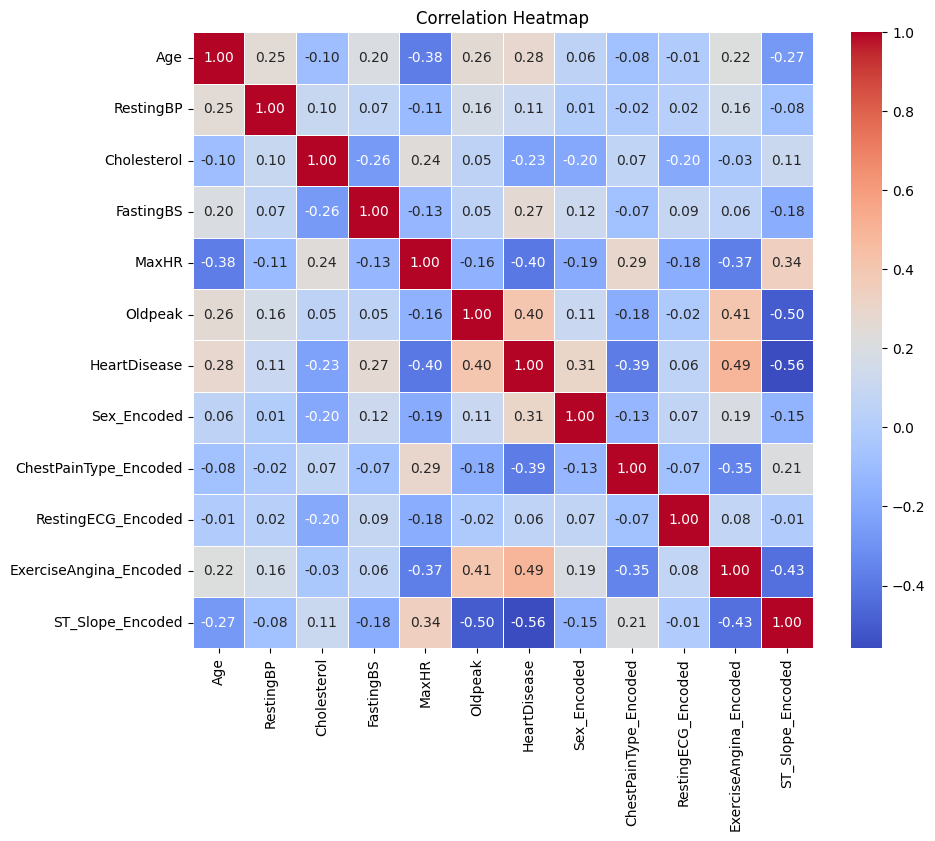

In [143]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='MaxHR'>

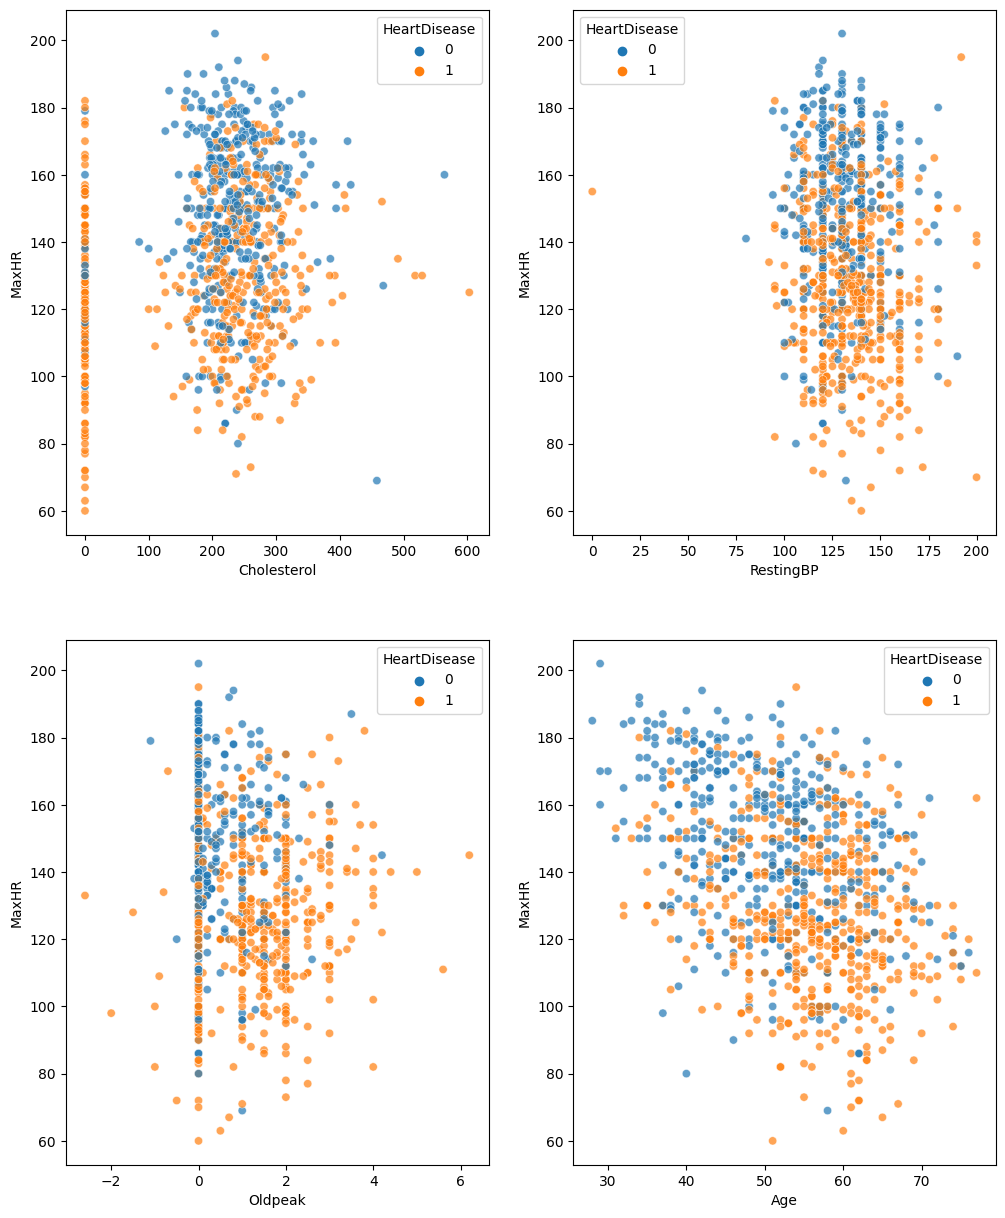

In [144]:
# sub plot
fig, ax = plt.subplots(2, 2, figsize=(12, 15))
# sns.scatterplot(x='MaxHR', y='ST_Slope_Encoded', hue='HeartDisease', data=df, alpha=0.7 , ax=ax[0, 0])
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=df, alpha=0.7, ax=ax[0, 0])
sns.scatterplot(x='RestingBP', y='MaxHR', hue='HeartDisease', data=df, alpha=0.7, ax=ax[0, 1])
sns.scatterplot(x='Oldpeak', y='MaxHR', hue='HeartDisease', data=df, alpha=0.7, ax=ax[1, 0])
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df, alpha=0.7, ax=ax[1, 1])


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

In [146]:
model = LogisticRegression()
model.fit(X_train, Y_train)

e:\packages\Anaconda3\envs\ydata_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3)*100 , "%")


Accuracy: 82.6 %


In [148]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        81
           1       0.87      0.81      0.84       103

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

